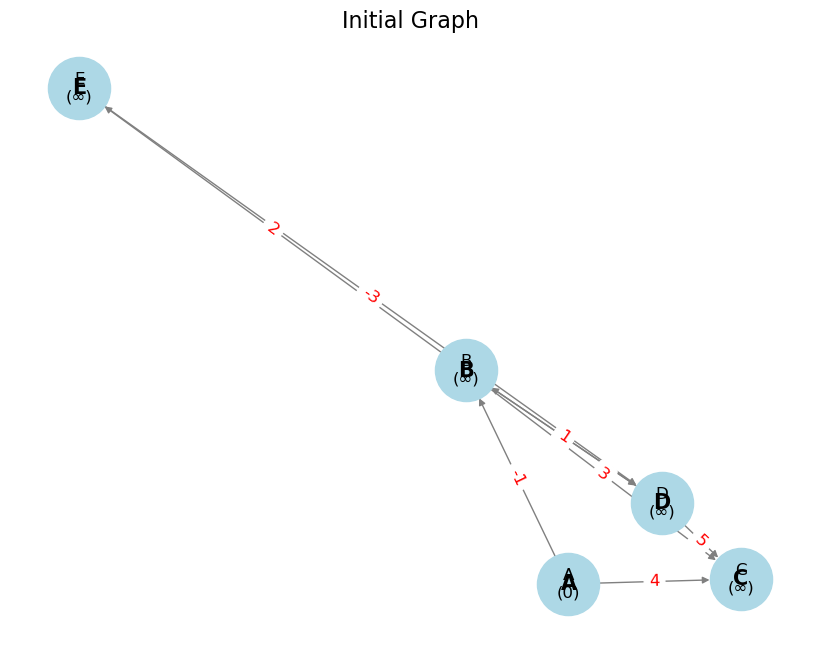

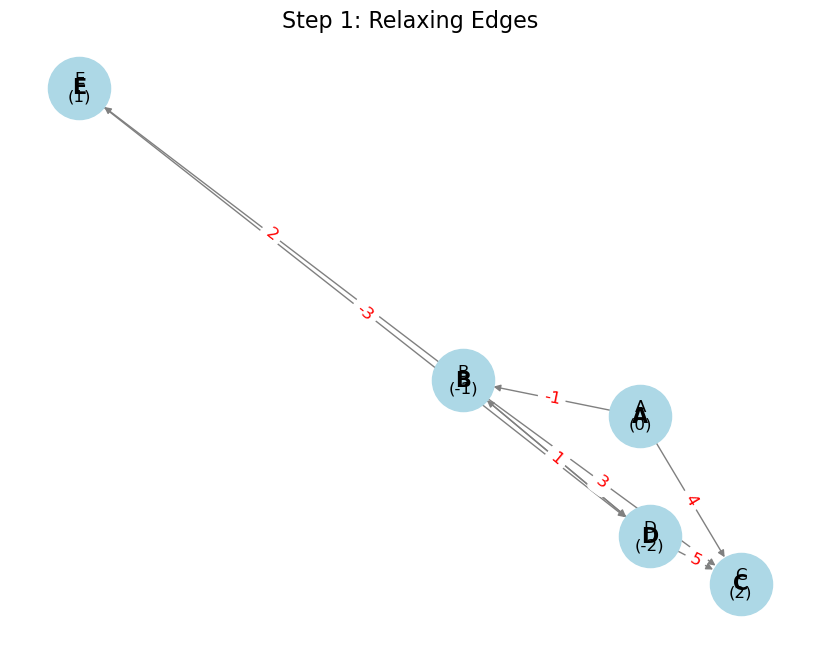

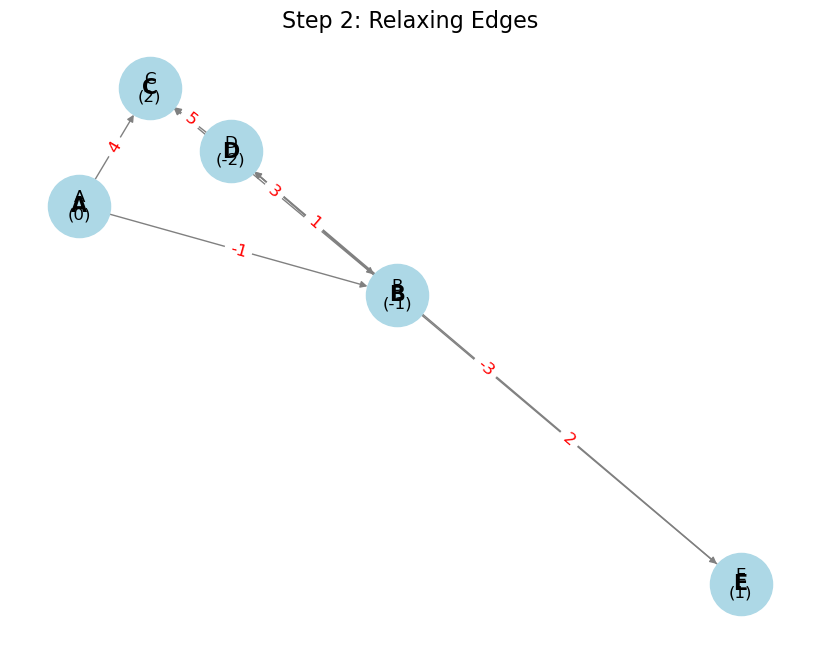

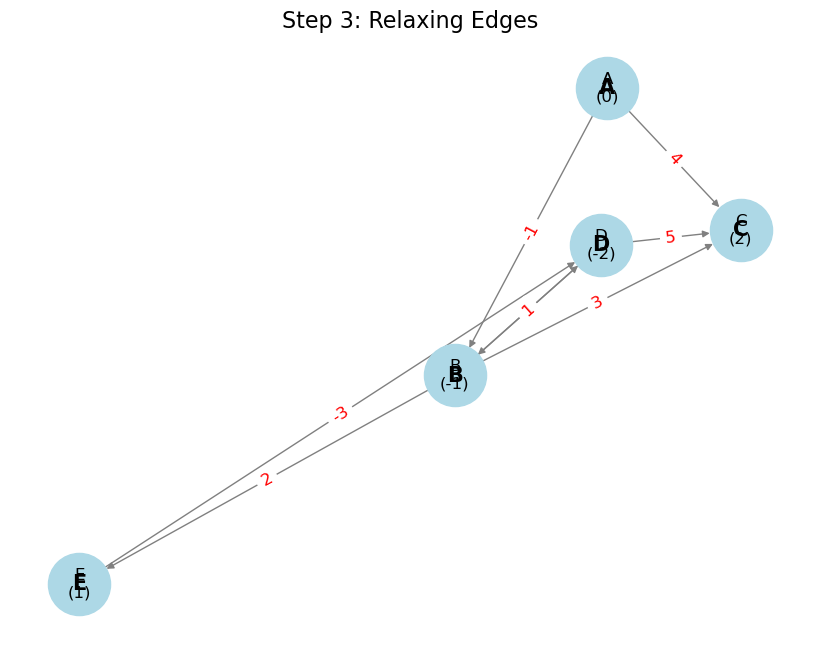

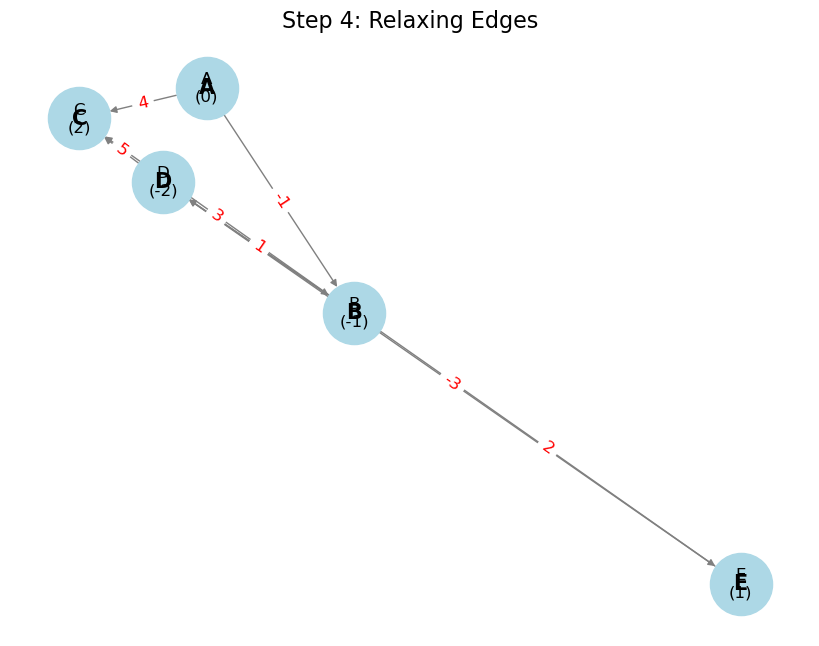

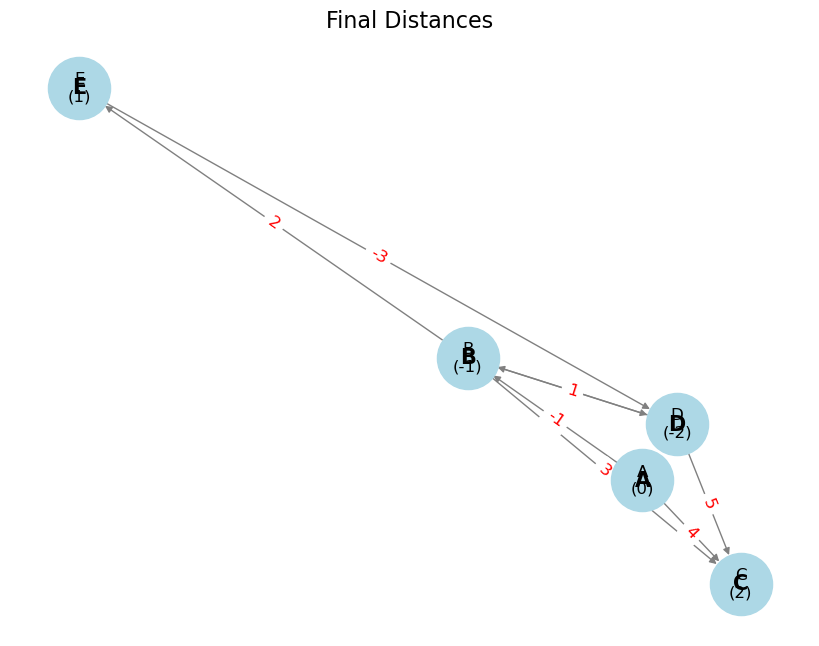

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
import time

def bellman_ford(graph, start):
    # Initialize distances and predecessor
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    predecessor = {node: None for node in graph}
    
    # Draw initial graph
    draw_graph(graph, distances, start, title="Initial Graph")
    
    # Relax edges |V|-1 times
    for i in range(len(graph) - 1):
        for u in graph:
            for v, weight in graph[u].items():
                if distances[u] + weight < distances[v]:
                    distances[v] = distances[u] + weight
                    predecessor[v] = u
        draw_graph(graph, distances, start, title=f"Step {i + 1}: Relaxing Edges")
        time.sleep(2)
    
    # Check for negative-weight cycles
    for u in graph:
        for v, weight in graph[u].items():
            if distances[u] + weight < distances[v]:
                raise ValueError("Graph contains a negative-weight cycle")
    
    draw_graph(graph, distances, start, title="Final Distances")
    return distances, predecessor

def draw_graph(graph, distances, start, title=""):
    G = nx.DiGraph()
    
    # Add edges with weights
    for u in graph:
        for v, weight in graph[u].items():
            G.add_edge(u, v, weight=weight)
    
    # Get positions for nodes
    pos = nx.spring_layout(G)
    
    # Draw nodes and edges
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=15, font_weight="bold")
    
    # Draw edge labels
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)
    
    # Draw node labels with distances
    labels = {node: f"{node}\n({distances[node] if distances[node] < float('inf') else '∞'})" for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_color="black", font_size=12)
    
    plt.title(title, fontsize=16)
    plt.show()

# Example Graph
graph = {
    'A': {'B': -1, 'C': 4},
    'B': {'C': 3, 'D': 2, 'E': 2},
    'C': {},
    'D': {'B': 1, 'C': 5},
    'E': {'D': -3}
    }

try:
    bellman_ford(graph, 'A')
except ValueError as e:
    print(e)

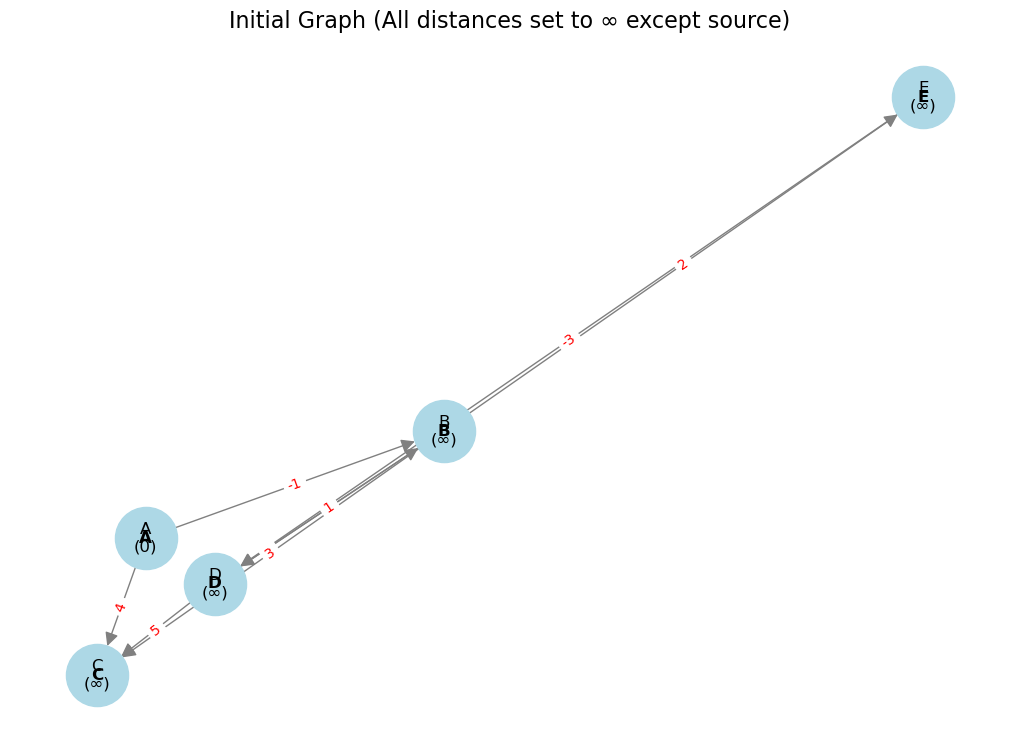

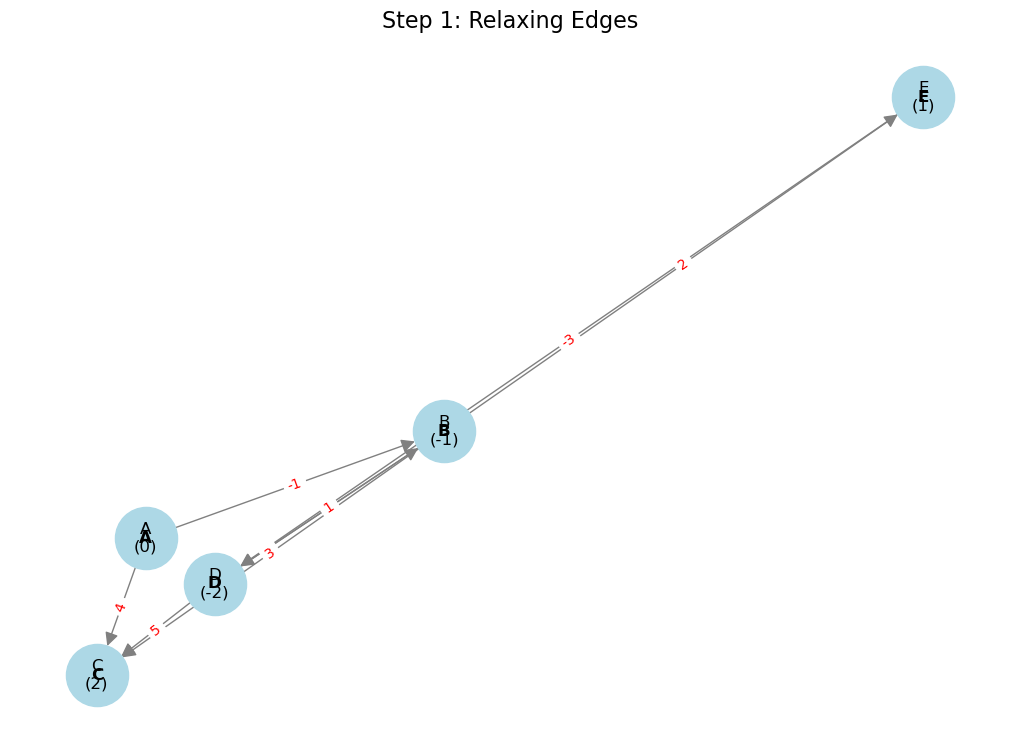

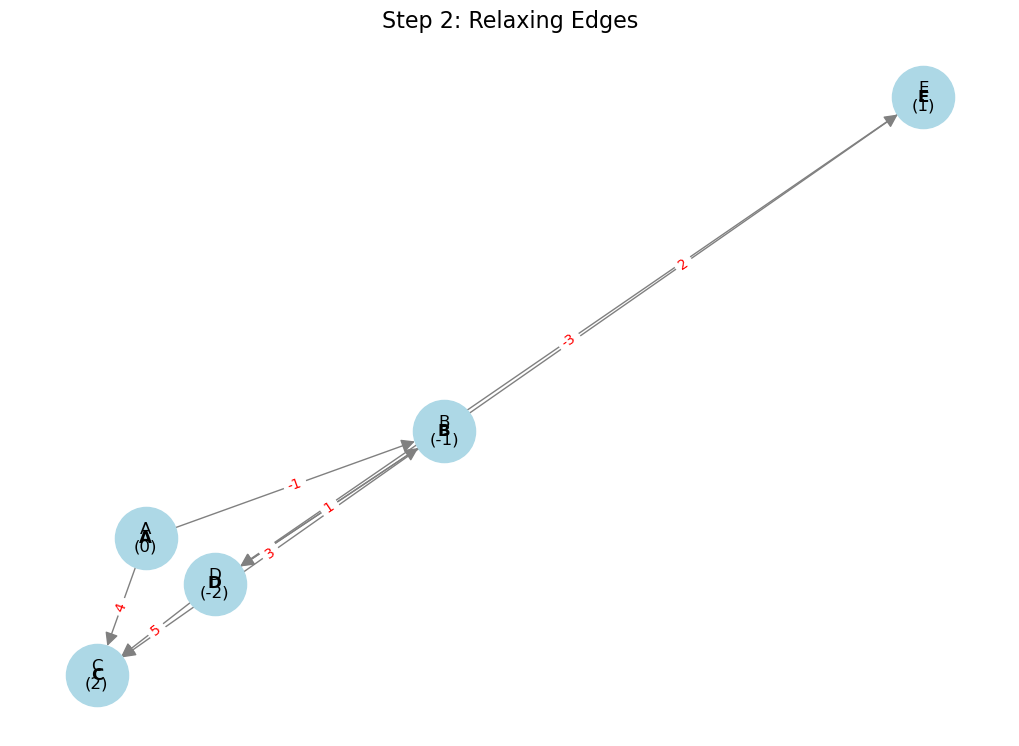

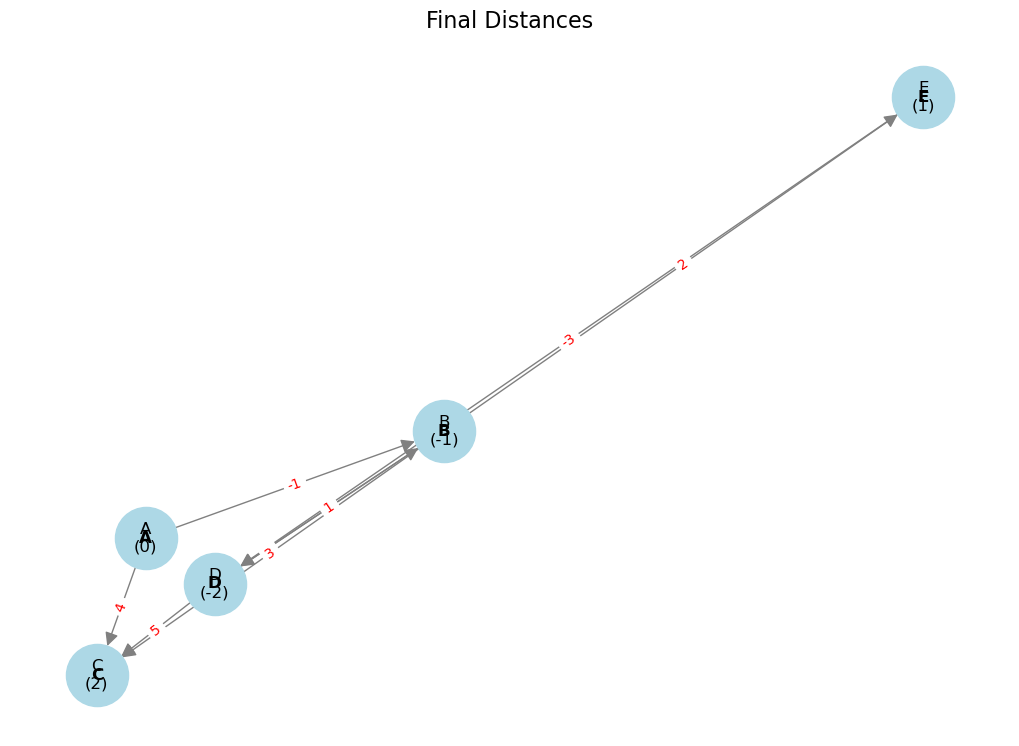

In [11]:


import matplotlib.pyplot as plt
import networkx as nx
import time

def bellman_ford(graph, start):
    # Initialize distances and predecessors
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    predecessor = {node: None for node in graph}
    
    # Visualize the initial graph
    draw_graph(graph, distances, title="Initial Graph (All distances set to ∞ except source)")

    # Relax edges |V|-1 times
    for i in range(len(graph) - 1):
        updated = False
        for u in graph:
            for v, weight in graph[u].items():
                if distances[u] + weight < distances[v]:
                    distances[v] = distances[u] + weight
                    predecessor[v] = u
                    updated = True
        draw_graph(graph, distances, title=f"Step {i + 1}: Relaxing Edges")
        time.sleep(2)
        if not updated:
            break

    # Check for negative-weight cycles
    for u in graph:
        for v, weight in graph[u].items():
            if distances[u] + weight < distances[v]:
                raise ValueError("Graph contains a negative-weight cycle")

    draw_graph(graph, distances, title="Final Distances")
    return distances, predecessor

def draw_graph(graph, distances, title=""):
    G = nx.DiGraph()

    # Add nodes and edges with weights
    for u in graph:
        for v, weight in graph[u].items():
            G.add_edge(u, v, weight=weight)

    # Use a circular layout to avoid overlapping
    pos = nx.spring_layout(G, seed=42)

    # Draw nodes and edges
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", 
            node_size=2000, font_size=12, font_weight="bold", arrowsize=20)

    # Draw edge labels (weights)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red", font_size=10)

    # Update node labels to show distances
    labels = {node: f"{node}\n({distances[node] if distances[node] != float('inf') else '∞'})" for node in G.nodes}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=12, font_color="black")

    plt.title(title, fontsize=16)
    plt.show()

# Example Graph
graph = {
    'A': {'B': -1, 'C': 4},
    'B': {'C': 3, 'D': 2, 'E': 2},
    'C': {},
    'D': {'B': 1, 'C': 5},
    'E': {'D': -3}
}

try:
    bellman_ford(graph, 'A')
except ValueError as e:
    print(e)

